# Palindrome Data (Extra)
## Matthew Swanevelder

## -----------------------------------------------------------------------

### Data Summary 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_excel(r"C:\Users\matts\Downloads\pone.0212445.s004.xlsx", header=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


In [77]:
za = gpd.read_file(r'C:\Users\matts\Desktop\gadm36_ZAF_shp\gadm36_ZAF_2.shp')
za.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.1_1,Alfred Nzo,None,None,District Municipality,District Municipality,DC44,ZA.EC.AN,"MULTIPOLYGON (((30.19438 -31.07847, 30.19431 -..."
1,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.2_1,Amathole,None,None,District Municipality,District Municipality,DC12,ZA.EC.AT,"MULTIPOLYGON (((27.48764 -33.27881, 27.48770 -..."
2,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.3_1,Buffalo City,None,None,District Municipality,District Municipality,BUF,None,"MULTIPOLYGON (((27.45834 -33.28153, 27.45847 -..."
3,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.4_1,Cacadu,None,None,District Municipality,District Municipality,DC10,ZA.EC.CC,"MULTIPOLYGON (((26.28514 -33.83736, 26.28514 -..."
4,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.5_1,Chris Hani,None,None,District Municipality,District Municipality,DC13,ZA.EC.CH,"POLYGON ((27.79465 -32.20645, 27.79479 -32.206..."


In [78]:
new_col=[]

for index, row in za.iterrows():
    if((df['District']==row['NAME_2']).any()):
        new_col.append(df[(df['District']==row['NAME_2']) & (df['Estimate']=='Survey')]['Prevalence_%'].values[0])
    else:
        new_col.append(0)
        
za['HIV_prevalence']=new_col

In [79]:
za.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,HIV_prevalence
0,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.1_1,Alfred Nzo,None,None,District Municipality,District Municipality,DC44,ZA.EC.AN,"MULTIPOLYGON (((30.19438 -31.07847, 30.19431 -...",12.7
1,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.2_1,Amathole,None,None,District Municipality,District Municipality,DC12,ZA.EC.AT,"MULTIPOLYGON (((27.48764 -33.27881, 27.48770 -...",0.0
2,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.3_1,Buffalo City,None,None,District Municipality,District Municipality,BUF,None,"MULTIPOLYGON (((27.45834 -33.28153, 27.45847 -...",13.6
3,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.4_1,Cacadu,None,None,District Municipality,District Municipality,DC10,ZA.EC.CC,"MULTIPOLYGON (((26.28514 -33.83736, 26.28514 -...",7.6
4,ZAF,South Africa,ZAF.1_1,Eastern Cape,None,ZAF.1.5_1,Chris Hani,None,None,District Municipality,District Municipality,DC13,ZA.EC.CH,"POLYGON ((27.79465 -32.20645, 27.79479 -32.206...",14.3


In [87]:
geo=[]
dis=[]
for index, row in za.iterrows():
    if(row['HIV_prevalence']>15):
        dis.append(row['NAME_2'])
        geo.append(row['geometry'].centroid)
        
dis_points = GeoDataFrame(dis, geometry=geo)
dis_points.columns=['district','geometry']

[]

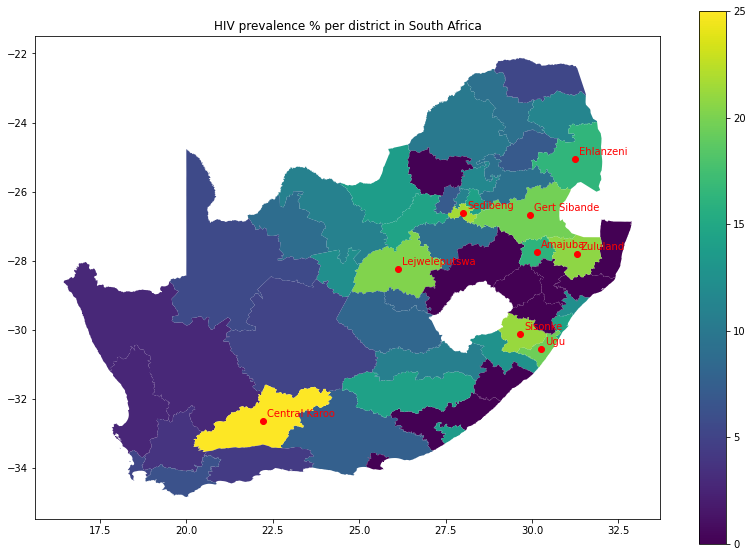

In [91]:
ax= za.plot(column='HIV_prevalence',figsize=(14, 14), legend=True, legend_kwds={'shrink': 0.7})
dis_points.plot(ax = ax, marker = "o", c = "red")
for x, y, label in zip(dis_points.geometry.x, dis_points.geometry.y, dis_points.district):
    ax.annotate(label, xy=(x, y), xytext=(4, 4), textcoords="offset points", color = "red")


plt.title('HIV prevalence % per district in South Africa')
plt.plot()